<a target="_blank" href="https://colab.research.google.com/github/trainocate-japan/Machine-Learning-and-Deep-Learning-Hands-on/blob/main/answer/4_決定木_ランダムフォレスト/4-1_決定木による戸建ての価格予測.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 4-1_決定木による戸建ての価格予測
このノートブックでは、決定木で回帰の予測モデルを作成します。

予測を行うテーマは線形回帰の演習で予測をした戸建て物件の価格を予測することです。

決定木は回帰にも分類にも用いることができ、用途に応じて以下の二つのモデルを使い分けます。
- 回帰：sklearn.tree.DecisionTreeRegressor
- 分類：sklearn.tree.DecisionTreeClassifier

[決定木のAPIドキュメント](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

## ライブラリのインポート

In [ ]:
# データを処理するための基本的なライブラリ
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# 決定木モデルをインポート
from sklearn.tree import DecisionTreeRegressor
# 決定木を可視化したい場合はplot_treeもインポートする
from sklearn.tree import plot_tree

In [ ]:
# matplotlibで日本語表示するための設定
!pip install japanize_matplotlib | tail -n 1
import japanize_matplotlib

## データの準備


#### データを取り込む
- pandasのread_csvメソッドを使用して、totsuka_kodate.csvファイルを読み込みます
- 読み込んだものは変数totsuka_kodateに代入します

In [ ]:
totsuka_kodate = pd.read_csv("totsuka_kodate.csv")

#### データを確認する

In [ ]:
# 読み込んだデータを確認（すでに確認済みのデータなのでheadのみ）
totsuka_kodate.head(2)

,地区名,最寄駅距離（分）,取引価格,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,築年数,構造,前面道路方位,前面道路種類,前面道路幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引年
0,秋葉町,45,33000000,125,ほぼ長方形,7.00000,100,令和2年,0,木造,東,市道,5.50000,第１種低層住居専用地域,50.00000,80.00000,2020
1,柏尾町,45,23000000,190,長方形,12.00000,110,昭和63年,33,木造,北,市道,6.50000,第１種低層住居専用地域,40.00000,80.00000,2021


#### 説明変数、目的変数を切り出す
- 説明変数は「'築年数','最寄駅距離（分）','延床面積（㎡）','面積（㎡）','前面道路幅員（ｍ）','地区名', '前面道路種類', '土地の形状'」をダミー変数化して選択
- 目的変数は「'取引価格'」を選択

In [ ]:
x = pd.get_dummies( totsuka_kodate[['築年数','最寄駅距離（分）','延床面積（㎡）','面積（㎡）','前面道路幅員（ｍ）','地区名', '前面道路種類', '土地の形状']])

In [ ]:
x.head(2)

,築年数,最寄駅距離（分）,延床面積（㎡）,面積（㎡）,前面道路幅員（ｍ）,地区名_上倉田町,地区名_上矢部町,地区名_下倉田町,地区名_俣野町,地区名_原宿,地区名_吉田町,地区名_名瀬町,地区名_戸塚町,地区名_東俣野町,地区名_柏尾町,地区名_汲沢,地区名_汲沢町,地区名_深谷町,地区名_矢部町,地区名_秋葉町,地区名_舞岡町,前面道路種類_区道,前面道路種類_市道,前面道路種類_県道,前面道路種類_私道,土地の形状_ほぼ台形,土地の形状_ほぼ整形,土地の形状_ほぼ正方形,土地の形状_ほぼ長方形,土地の形状_不整形,土地の形状_台形,土地の形状_袋地等,土地の形状_長方形
0,0,45,100,125,5.50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,33,45,110,190,6.50000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = totsuka_kodate['取引価格']

In [ ]:
y.head(2)

0    33000000
1    23000000
Name: 取引価格, dtype: int64

#### データを訓練データとテストデータに分割する
**本研修でtotsuka_kodateデータセットを使用する際には、訓練データ70%、random_state=8で固定しています。他のモデルとの比較をしやすくするためです**

In [ ]:
# 訓練データと検証データに分割(70%を訓練用に使用)
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=8)

決定木系のモデルではスケールを調整する必要は基本的にありません。決定木は値の大小だけで判断を行うためです。

## モデルの定義

In [ ]:
model = DecisionTreeRegressor(random_state=0)

## モデルの学習

In [ ]:
model.fit(train_x,train_y)

DecisionTreeRegressor(random_state=0)

## 作成された決定木を可視化する
学習したモデルで精度を評価する前に学習により作成された、決定木を可視化してみます。<br>
木を可視化することで何が重要な説明変数だったのかのヒントを得ることができるかもしれません。

可視化をする方法はいくつかありますが、今回はscikit-learnのplot_treeメソッドを用います。

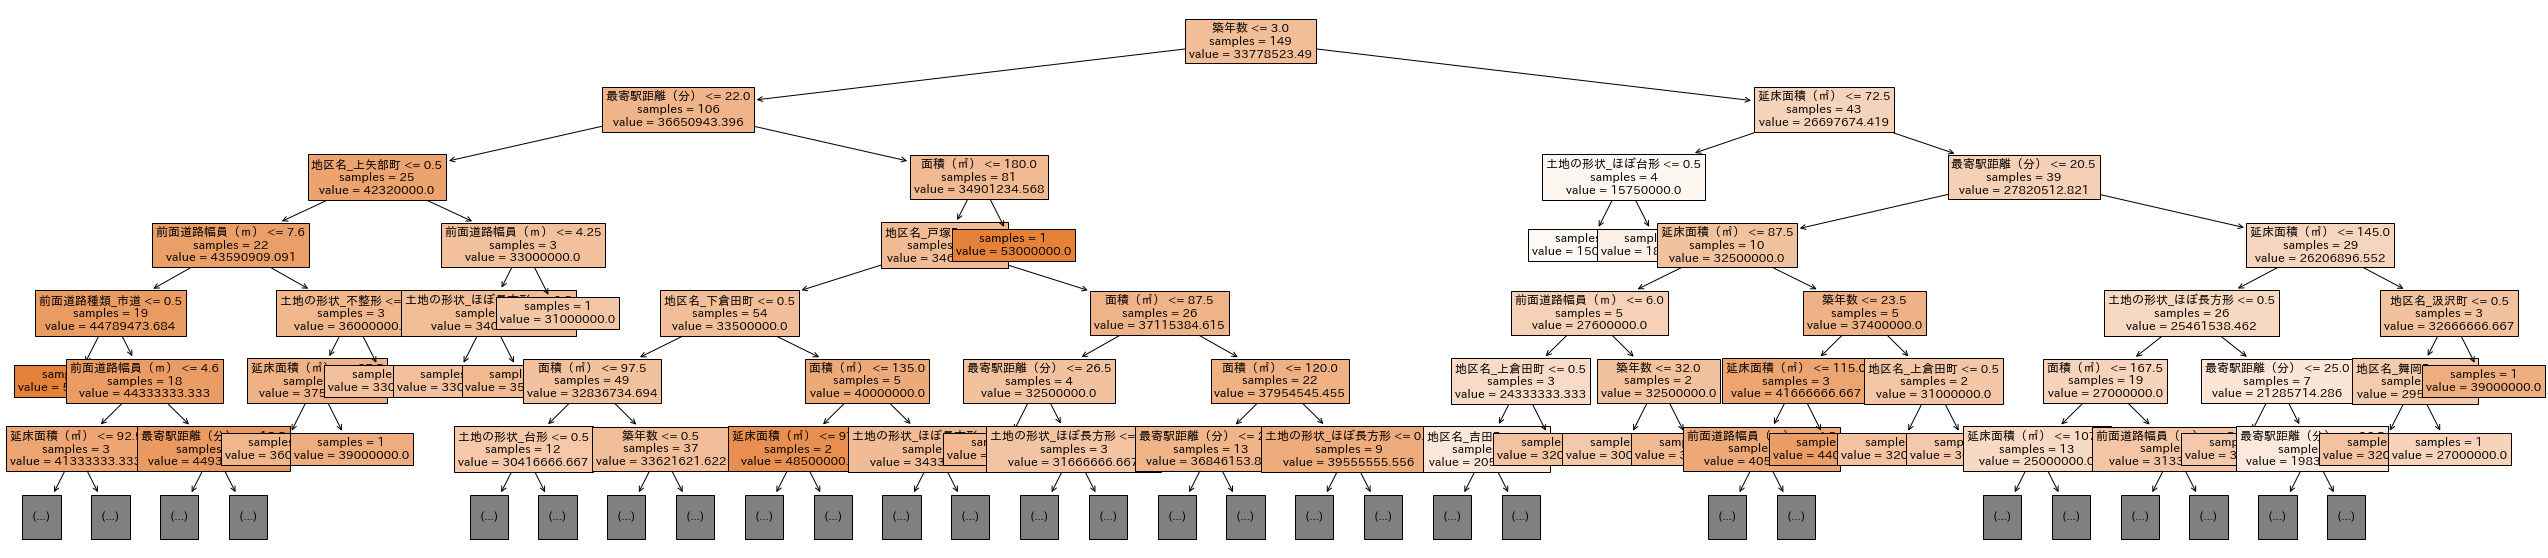

In [ ]:
# 決定木の可視化を行う
# matplotlibで画像サイズの調整（横幅、縦幅）
plt.figure(figsize=(45,10))
# 描画と設定
plot_tree(
    model, # 可視化するモデルを指定
    max_depth=6, # 可視化する木の深さ
    feature_names = train_x.columns, # 分割するときの説明変数名を設定
    filled=True, # 色を付ける場合はTrue
    fontsize=12,
    impurity=False # ジニ不純度(どれくらい分類できていないかどうか)を表示するかどうか
    )
#matplotlibで保存
#plt.savefig("tree.pdf")
plt.show()  # 結果を表示する

多くの分岐があり、一見すると何が大事なのかわかりにくいですが、特に多くのサンプルを分割できている条件は重要な特徴量（説明変数）である可能性があります。<br>
これはなぜその物件が高いのか安いのかということを理由付ける条件を推察することに役立ちます。

## 評価

In [ ]:
# 訓練データで精度を確認してみる
model.score(train_x, train_y)

1.000

In [ ]:
# 検証データで精度を確認してみる
model.score(val_x, val_y)

0.346

In [ ]:
# 訓練データで予測し、そのうち最初の5件だけを表示する
model.predict(train_x)[:5]

array([39000000., 33000000., 38000000., 27000000., 33000000.])

In [ ]:
# 正解を確認してみる
train_y.values[:5]

array([39000000, 33000000, 38000000, 27000000, 33000000])

In [ ]:
# 検証データで予測し、最初の5件だけを表示する
model.predict(val_x)[:5]

array([38000000., 39000000., 42000000., 26000000., 33000000.])

In [ ]:
# 正解を確認してみる
val_y.values[:5]

array([38000000, 36000000, 34000000, 30000000, 34000000])

決定木は、予測を説明しやすいことが大きな長所ですが、デフォルトの設定ではトレーニングデータに完全に適合するまで木を作り続けてしまうため、訓練データの特徴に過剰に適合し汎用性がない状態になってしまう過学習を起こしやすい欠点があります。

次は、決定木の過学習を緩和させるためにハイパーパラメータを調整してみます。

# 決定木モデルのパラメータチューニング

決定木の過学習を抑制するために、モデルを学習する際の詳細設定を行うハイパーパラメータを調整します。

決定木のハイパーパラメータのうち特に重要なハイパーパラメータは以下の3つです
- **max_depth:**決定木の最大の深さ
- **min_sample_leaf:**葉ノード（木の先端）に分類される最小のサンプル数。この数を下回らないようになる。
- **max_leaf_nodes:**葉ノードの総数

主には上のハイパーパラメータのうち1つか2つを調整するケースが多いです。そのほかのハイパーパラメータについては以下の公式リファレンスに記載があります。<br>
[決定木のAPIリファレンス](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

In [ ]:
# ハイパーパラメータを変えて、精度の変化を確認してみましょう
# 今回はmax_depthを変更してみます
model = DecisionTreeRegressor(max_depth = 5, random_state=0)
model.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [ ]:
# 訓練データで精度を確認してみる
model.score(train_x, train_y)

0.783

In [ ]:
# 検証データで精度を確認してみる
model.score(val_x, val_y)

0.433

In [ ]:
# 訓練データで予測し、そのうち最初の5件だけを表示する
model.predict(train_x)[:5]

array([39000000.   , 37954545.455, 37954545.455, 27000000.   ,
       32836734.694])

In [ ]:
# 正解を確認してみる
train_y.values[:5]

array([39000000, 33000000, 38000000, 27000000, 33000000])

In [ ]:
# 検証データで予測し、最初の5件だけを表示する
model.predict(val_x)[:5]

array([37954545.455, 44333333.333, 37954545.455, 32836734.694,
       32836734.694])

In [ ]:
# 正解を確認してみる
val_y.values[:5]

array([38000000, 36000000, 34000000, 30000000, 34000000])

**※ 調整例**

`model = DecisionTreeRegressor(max_depth=5, random_state=0)`

過学習を抑制して43%程の精度が出ます。

## 特徴量（説明変数）の重要度を確認する
決定木は木の作成に使われた特徴量（説明変数）のうち重要なものが何であったかを定量的に出力することもできます。<br>
需要な特徴量を把握することは実務上でも役立ちますし、他のモデルを用いるときにどの特徴量を使うのが有効なのかを判断することにも役立ちます。

In [ ]:
# 特徴量重要度
importances= model.feature_importances_
importances

array([0.44 , 0.198, 0.126, 0.06 , 0.037, 0.   , 0.041, 0.032, 0.   ,
       0.   , 0.   , 0.   , 0.032, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.023, 0.002, 0.   , 0.   , 0.   ])

In [ ]:
# DataFrameに整形して出力
# dataを特徴量重要度に設定し、行のインデックスを説明変数の列名にする
df_importances =pd.DataFrame(data=importances, index=train_x.columns)
df_importances

,0
築年数,0.43966
最寄駅距離（分）,0.19753
延床面積（㎡）,0.12583
面積（㎡）,0.05989
前面道路幅員（ｍ）,0.03689
地区名_上倉田町,0.00000
地区名_上矢部町,0.04102
地区名_下倉田町,0.03225
地区名_俣野町,0.00000
地区名_原宿,0.00000


In [ ]:
# 特徴量重要度（0番目の列）でソートする。ascending=Falseで降順に並び替える
df_importances.sort_values(0, ascending=False)

,0
築年数,0.43966
最寄駅距離（分）,0.19753
延床面積（㎡）,0.12583
面積（㎡）,0.05989
地区名_上矢部町,0.04102
前面道路幅員（ｍ）,0.03689
地区名_下倉田町,0.03225
地区名_戸塚町,0.03178
土地の形状_ほぼ長方形,0.02314
前面道路種類_市道,0.00986


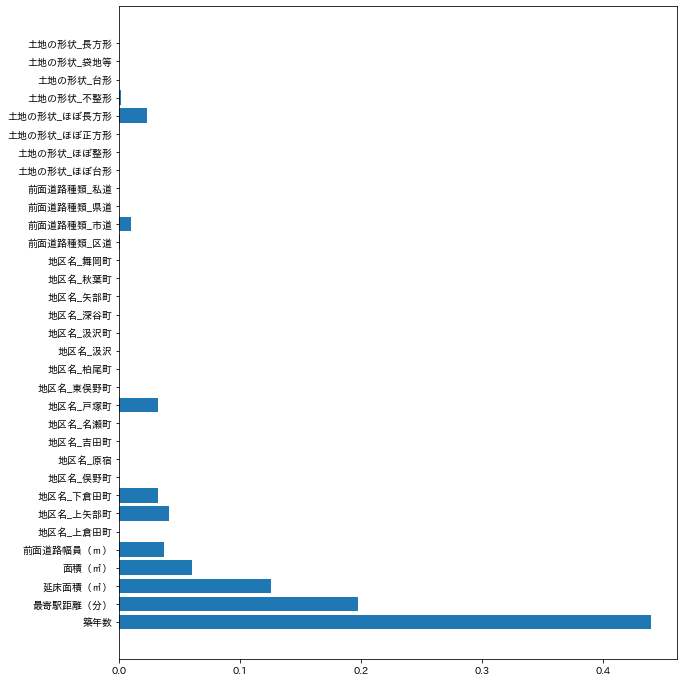

In [ ]:
# （参考）matplotlibで棒グラフにする
plt.figure(figsize=(10,12))   # グラフのサイズ
n_features = train_x.shape[1] # 特徴量の数
plt.barh(range(n_features), model.feature_importances_, align='center') # x軸に特徴量、y軸に重要度を表示して中央寄せ（横棒グラフなので、x,yが逆）
plt.yticks(np.arange(n_features), train_x.columns) # x軸に項目名を表示
plt.plot;                     # グラフを表示

完全に0の特徴量もありますが、これは一度も木の作成に用いられなかった特徴量です。これらは全く役に立たないわけではなく、今回は木の作成に採用されなかっただけだということにも注意してください。<br>
のちに出てくるランダムフォレストや勾配ブースティング木の方がより偏りなく見ることができます。

このノートブックは以上です。